<a href="https://colab.research.google.com/github/AlessioMichelassi/SuperDuperPython2/blob/master/fastAi_bearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.3 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
# Import delle librerie necessarie
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
from fastdownload import download_url
key1 = "82ab287b2ab34401855a7c7e14155c56"
endPoint = "https://api.bing.microsoft.com/"
class BingImageSearch:
    path = "/content/temp"
    errorLog = []

    def __init__(self):
        if not os.path.exists(self.path):
            os.mkdir(self.path)

    def searchImages(self, term, *args):
        # Construct the search query
        query = f"{term} {' '.join(args)}"
        search_url = endPoint + "/v7.0/images/search"

        headers = {"Ocp-Apim-Subscription-Key": key1}
        params = {"q": query, "license": "public", "imageType": "photo"}
        response = requests.get(search_url, headers=headers, params=params)
        response.raise_for_status()
        search_results = response.json()
        return self.fromJsonToList(search_results)

    @staticmethod
    def fromJsonToList(jsonDict):
        urls = []
        for url in jsonDict["value"]:
            urls.append(url["contentUrl"])
        return urls

    def downloadImages(self, term, image_urls):
        path = os.path.join(self.path, term)
        if not os.path.exists(path):
            os.mkdir(path)
        for i, image_url in enumerate(image_urls):
            try:
                destinationPath = f"{path}/{term}_{i}.jpg"
                download_url(image_url, destinationPath)
                print(f"Scaricata immagine {i} da {image_url}")
            except Exception as e:
                print(f"Errore nel scaricare l'immagine da {image_url}: {e}")
                self.errorLog.append(f"Errore nel scaricare l'immagine da {image_url}: {e}")
                continue
        self.convertToJpeg(path)

    def convertToJpeg(self, folder):
        images = os.listdir(folder)
        newImages = []
        for image in images:
            try:
                img = Image.open(f"{folder}/{image}")
                img = img.convert("RGB")
                newImages.append(image)
                os.remove(f"{folder}/{image}")
                img.save(f"{folder}/{image}")
            except Exception as e:
                print(f"Errore nel convertire l'immagine {image}: {e}")
                self.errorLog.append(f"Errore nel convertire l'immagine {image}: {e}")
                continue


# test class

bing = BingImageSearch()
ims = bing.searchImages("bear", "")
bing.downloadImages("bear", ims)
ims = bing.searchImages("grizzly", "+bear")
bing.downloadImages("grizzly", ims)
ims = bing.searchImages("black", "+bear")
bing.downloadImages("black", ims)

Scaricata immagine 0 da https://www.publicdomainpictures.net/pictures/220000/velka/kodiak-brown-bear.jpg


Scaricata immagine 1 da https://www.publicdomainpictures.net/pictures/240000/velka/grizzly-bear-portrait-1511961987XRY.jpg


Scaricata immagine 2 da https://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-profile.jpg


Scaricata immagine 3 da https://www.publicdomainpictures.net/pictures/230000/velka/brown-bear-1504708649cqE.jpg


Scaricata immagine 4 da https://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-portrait.jpg


Scaricata immagine 5 da https://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-swimming.jpg


Scaricata immagine 6 da https://images.pexels.com/photos/35435/pexels-photo.jpg?auto=compress&cs=tinysrgb&h=750&w=1260


Scaricata immagine 7 da https://cdn.pixabay.com/photo/2017/06/09/23/40/brown-bear-2388620_960_720.jpg


Scaricata immagine 8 da https://www.publicdomainpictures.net/pictures/290000/velka/bear-1553466488Omv.jpg


Scaricata immagine 9 da https://c.pxhere.com/photos/d7/07/bear_animal_wildlife_wild_zoology_mammal_species_wilderness-1257057.jpg!d


Scaricata immagine 10 da https://www.publicdomainpictures.net/pictures/270000/velka/bear-1532880147y8h.jpg


Scaricata immagine 11 da https://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-swimming-4.jpg


Scaricata immagine 12 da https://www.publicdomainpictures.net/pictures/100000/velka/sleeping-bear.jpg


Scaricata immagine 13 da https://cdn.pixabay.com/photo/2016/09/13/03/00/bear-1666301_960_720.jpg


Scaricata immagine 14 da https://www.publicdomainpictures.net/pictures/100000/velka/black-bear-14060013468Fu.jpg


Scaricata immagine 15 da https://c.pxhere.com/photos/25/c4/grizzly_bear_cub_yellowstone_wildlife_animal_fur_powerful_predator-774705.jpg!d


Scaricata immagine 16 da http://www.publicdomainpictures.net/pictures/210000/velka/grizzly-bear-portrait-14822363264RS.jpg


Scaricata immagine 17 da https://cdn.pixabay.com/photo/2018/03/08/15/10/bear-3208852_960_720.png


Scaricata immagine 18 da https://c.pxhere.com/photos/4d/b8/bear_adult_brown_portrait_wildlife_nature_looking_up_furry-1229199.jpg!d


Scaricata immagine 19 da http://www.publicdomainpictures.net/pictures/90000/velka/black-bear-up-close.jpg


Scaricata immagine 20 da https://www.publicdomainpictures.net/pictures/290000/velka/grizzly-bear-1550541843uS9.jpg


Scaricata immagine 21 da https://cdn.pixabay.com/photo/2017/07/11/15/20/bear-2493889_960_720.jpg


Scaricata immagine 22 da http://www.publicdomainpictures.net/pictures/100000/velka/black-bear-sitting.jpg


Scaricata immagine 23 da https://c.pxhere.com/photos/4b/b5/bear_animal_snow_winter_nature-1132518.jpg!d


Scaricata immagine 24 da https://www.publicdomainpictures.net/pictures/290000/velka/grizzly-bear-1552692274rEg.jpg


Scaricata immagine 25 da https://c.pxhere.com/photos/b9/2b/kodiak_bear_adult_portrait_wildlife_nature_looking_up_wilderness_fur-1229201.jpg!d


Scaricata immagine 26 da https://c.pxhere.com/photos/81/70/bear_animal_wildlife_mammal_grizzly-126157.jpg!d


Scaricata immagine 27 da https://c.pxhere.com/photos/44/24/bear_grizzly_dangerous_danger_predator_wildlife_face_animal-1191700.jpg!d


Scaricata immagine 28 da https://cdn.pixabay.com/photo/2014/06/18/15/27/bear-371352_960_720.jpg


Scaricata immagine 29 da https://www.publicdomainpictures.net/pictures/20000/velka/el-oso-21691289222522HTO.jpg


Scaricata immagine 30 da https://c.pxhere.com/photos/03/bb/animals_zoo_bear_animal-1134389.jpg!d


Scaricata immagine 31 da https://c.pxhere.com/photos/7d/10/naturaleza_macro_nature_animals_animales_gaby1_canon550d_ggl1-407841.jpg!d


Scaricata immagine 32 da https://www.publicdomainpictures.net/pictures/170000/velka/polar-bear-walking.jpg


Scaricata immagine 33 da https://cdn.pixabay.com/photo/2012/07/04/19/09/black-bear-51477_960_720.jpg


Scaricata immagine 34 da https://www.publicdomainpictures.net/pictures/240000/velka/black-bear-1512837830ExP.jpg


Scaricata immagine 0 da https://www.publicdomainpictures.net/pictures/240000/velka/grizzly-bear-portrait-1511961987XRY.jpg


Scaricata immagine 1 da http://c2.peakpx.com/wallpaper/953/406/491/bear-zoo-wildlife-nature-wallpaper.jpg


Scaricata immagine 2 da https://www.publicdomainpictures.net/pictures/220000/velka/kodiak-brown-bear.jpg


Scaricata immagine 3 da https://cdn.pixabay.com/photo/2016/04/26/11/59/brown-bear-1354306_960_720.jpg


Scaricata immagine 4 da http://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-profile.jpg


Scaricata immagine 5 da https://www.publicdomainpictures.net/pictures/350000/velka/grizzly-bear-walking-on-grassy-hill.jpg


Scaricata immagine 6 da https://pixnio.com/free-images/fauna-animals/bears/grizzly-bear-on-a-rock-overlooking.jpg


Scaricata immagine 7 da https://pixnio.com/free-images/fauna-animals/bears/grizzly-bear-cub-walking-brown-bear.jpg


Scaricata immagine 8 da http://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-portrait.jpg


Scaricata immagine 9 da https://www.publicdomainpictures.net/pictures/290000/velka/bear-1553466488Omv.jpg


Scaricata immagine 10 da http://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-swimming.jpg


Scaricata immagine 11 da https://cdn.pixabay.com/photo/2019/03/24/13/56/bear-4077751_1280.png


Scaricata immagine 12 da https://www.publicdomainpictures.net/pictures/290000/velka/grizzly-bear-1550541843uS9.jpg


Scaricata immagine 13 da https://images.pexels.com/photos/1068554/pexels-photo-1068554.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260


Scaricata immagine 14 da https://www.publicdomainpictures.net/pictures/350000/velka/grizzly-bear-in-grass-close-up.jpg


Scaricata immagine 15 da https://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-closeup.jpg


Scaricata immagine 16 da https://c.pxhere.com/photos/e3/3c/european_brown_bear_wild_animal_bear_dangerous_animal_world_fur_nature_animal-554721.jpg!d


Scaricata immagine 17 da https://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-swimming-4.jpg


Scaricata immagine 18 da https://c.pxhere.com/photos/7c/5b/bear_nature_animal_animals_jump_language_puppy_bears-1221057.jpg!d


Scaricata immagine 19 da https://www.publicdomainpictures.net/pictures/310000/nahled/grizzly-bear-1564257594hjC.jpg


Scaricata immagine 20 da https://c.pxhere.com/photos/8d/03/bear_puppy_small_brown_bear_the_beast_animal_turkish_the_eye-1037874.jpg!d


Scaricata immagine 21 da https://c.pxhere.com/photos/8f/86/bear_brown_bear_wildlife_nature_furry_head_powerful_looking-1264994.jpg!d


Scaricata immagine 22 da https://cdn.pixabay.com/photo/2014/08/22/14/09/bear-424383_960_720.jpg


Scaricata immagine 23 da http://www.publicdomainpictures.net/pictures/210000/velka/grizzly-bear-portrait-14822363264RS.jpg


Scaricata immagine 24 da https://c.pxhere.com/photos/7d/10/naturaleza_macro_nature_animals_animales_gaby1_canon550d_ggl1-407841.jpg!d


Scaricata immagine 25 da https://www.publicdomainpictures.net/pictures/230000/velka/grizzly-bear.jpg


Scaricata immagine 26 da https://c.pxhere.com/photos/4d/b8/bear_adult_brown_portrait_wildlife_nature_looking_up_furry-1229199.jpg!d


Scaricata immagine 27 da http://www.public-domain-image.com/free-images/fauna-animals/bears/grizzly-bears-animal-wildlife.jpg


Scaricata immagine 28 da https://c.pxhere.com/photos/98/66/bear_brown_bear_wild_animal_mammal_predator_zoo_wildlife_park-705802.jpg!d


Scaricata immagine 29 da https://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-swimming-2.jpg


Scaricata immagine 30 da https://c.pxhere.com/photos/7d/a9/bear_brown_bear_grizzly_grizzly_bear_animal_zoo_teddy_mammal-942894.jpg!d


Scaricata immagine 31 da https://cdn.pixabay.com/photo/2016/09/13/03/00/bear-1666301_960_720.jpg


Scaricata immagine 32 da https://cdn.pixabay.com/photo/2018/03/08/15/10/bear-3208852_960_720.png


Scaricata immagine 33 da https://c.pxhere.com/photos/81/70/bear_animal_wildlife_mammal_grizzly-126157.jpg!d


Scaricata immagine 34 da https://www.publicdomainpictures.net/pictures/90000/velka/grizzly-bear-running.jpg


Scaricata immagine 0 da http://www.publicdomainpictures.net/pictures/100000/velka/black-bear-14060013468Fu.jpg


Scaricata immagine 1 da https://www.publicdomainpictures.net/pictures/100000/velka/black-bear-14060013468Fu.jpg


Scaricata immagine 2 da https://pixnio.com/free-images/fauna-animals/bears/black-bear-sitting-on-a-rock.jpg


Scaricata immagine 3 da http://www.publicdomainpictures.net/pictures/100000/velka/black-bear-sitting.jpg


Scaricata immagine 4 da https://www.publicdomainpictures.net/pictures/240000/velka/black-bear-1512837830ExP.jpg


Scaricata immagine 5 da http://www.publicdomainpictures.net/pictures/220000/velka/black-bear-1493437087RRW.jpg


Scaricata immagine 6 da https://pixnio.com/free-images/2016/06/06/louisiana-black-bear-725x483.jpg


Scaricata immagine 7 da https://www.publicdomainpictures.net/pictures/30000/velka/black-bear-13518416899vm.jpg


Scaricata immagine 8 da https://publicdomainpictures.net/pictures/20000/velka/black-bear-1326453984aWL.jpg


Scaricata immagine 9 da https://www.publicdomainpictures.net/pictures/20000/velka/black-bear.jpg


Scaricata immagine 10 da https://c.pxhere.com/photos/88/ad/bear_brown_black_wildlife_grizzly-492680.jpg!d


In [11]:
ims = bing.searchImages("teddy", "+bear")
bing.downloadImages("teddy", ims)

Scaricata immagine 0 da https://cdn.pixabay.com/photo/2016/03/31/19/32/bear-1295092_960_720.jpg


Scaricata immagine 1 da https://www.publicdomainpictures.net/pictures/220000/velka/teddy-bear-1496656082fAN.jpg


Scaricata immagine 2 da https://www.publicdomainpictures.net/pictures/140000/velka/christmas-teddy-bear-1446734725K0L.jpg


Scaricata immagine 3 da https://static.pexels.com/photos/37158/pexels-photo.jpg
Errore nel scaricare l'immagine da https://get.pxhere.com/photo/teddy-bear-toy-stuffed-toy-leaf-tree-plush-plant-wildlife-1521455.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"><meta http-equiv="refresh" content="375"></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><noscript><div id="challenge-error-title"><div class="h2"><span class="icon-wrapper"><div class="heading-icon warning-icon"></div></span><span id="challenge-error-text">Enable JavaScript and cookies to continue</span></div></div></noscript></

Scaricata immagine 5 da https://c.pxhere.com/photos/a5/f6/teddy_plush_toys_funny_cute_bears_sweet_fun-611398.jpg!d


Scaricata immagine 6 da http://www.publicdomainpictures.net/pictures/130000/velka/teddy-bear-14374486104Lp.jpg


Scaricata immagine 7 da https://www.publicdomainpictures.net/pictures/240000/velka/soft-cuddly-teddy-bear.jpg


Scaricata immagine 8 da https://www.publicdomainpictures.net/pictures/310000/velka/teddy-bear-sitting.jpg


Scaricata immagine 9 da https://www.publicdomainpictures.net/pictures/140000/velka/christmas-teddy-bear-1446865888Y5V.jpg


Scaricata immagine 10 da https://www.publicdomainpictures.net/pictures/40000/velka/teddy-bear-13625934280g7.jpg


Scaricata immagine 11 da https://cdn.pixabay.com/photo/2015/07/26/12/27/teddy-bear-861060_960_720.jpg


Scaricata immagine 12 da http://www.publicdomainpictures.net/pictures/10000/velka/964-1238847018c9Gu.jpg


Scaricata immagine 13 da https://www.publicdomainpictures.net/pictures/210000/velka/teddy-bears-face.jpg


Scaricata immagine 14 da https://c.pxhere.com/photos/45/d1/teddy_bear_plush_toy_bear_children's_play-826184.jpg!d


Scaricata immagine 15 da https://pixnio.com/free-images/2017/11/02/2017-11-02-16-55-32-1185x900.jpg


Scaricata immagine 16 da http://www.publicdomainpictures.net/pictures/30000/velka/teddy-bear-face.jpg


Scaricata immagine 17 da https://www.publicdomainpictures.net/pictures/120000/velka/teddy-bear-1433759431xyq.jpg


Scaricata immagine 18 da https://c.pxhere.com/photos/40/3d/oktoberfest_teddy_hat_bavaria_costume_tradition_munich_bavarian-611405.jpg!d


Scaricata immagine 19 da https://www.publicdomainpictures.net/pictures/310000/velka/teddy-bear-portrait-1573411728vug.jpg


Scaricata immagine 20 da https://www.publicdomainpictures.net/pictures/250000/velka/cute-teddy-bears-face.jpg


Scaricata immagine 21 da https://www.publicdomainpictures.net/pictures/10000/velka/1-1222525662QjTd.jpg


Scaricata immagine 22 da https://www.publicdomainpictures.net/pictures/310000/velka/teddy-bear-portrait.png


Scaricata immagine 23 da https://www.publicdomainpictures.net/pictures/310000/velka/teddy-bear-portrait.jpg


Scaricata immagine 24 da https://cdn.pixabay.com/photo/2015/05/31/16/04/teddy-bear-792278_960_720.jpg


Scaricata immagine 25 da https://www.publicdomainpictures.net/pictures/310000/velka/mr-bean-teddy-bear-1573547081Edg.jpg


Scaricata immagine 26 da https://cdn.pixabay.com/photo/2014/08/22/19/06/teddy-424630_960_720.jpg


Scaricata immagine 27 da https://www.publicdomainpictures.net/pictures/70000/velka/teddy-bear-13905752584CF.jpg


Scaricata immagine 28 da https://publicdomainpictures.net/pictures/50000/velka/cute-toy-teddy-baby-bear.jpg


Scaricata immagine 29 da https://www.publicdomainpictures.net/pictures/40000/velka/teddy.jpg


Scaricata immagine 30 da https://www.publicdomainpictures.net/pictures/320000/velka/christmas-teddy-bear-framed-white-1576569467k5R.jpg


Scaricata immagine 31 da https://c.pxhere.com/photos/b3/85/bear_teddy_soft_toy_stuffed_animal_teddy_bear_brown_bear_children_animal-638250.jpg!d


Scaricata immagine 32 da https://cdn.pixabay.com/photo/2015/05/31/16/03/teddy-bear-792273_960_720.jpg


Scaricata immagine 33 da https://c.pxhere.com/photos/ff/f3/christmas_greeting_card_teddy_santa_hat_plush_cute_children_toys_funny-1177268.jpg!d


Scaricata immagine 34 da https://www.publicdomainpictures.net/pictures/30000/velka/teddy-bear-with-a-guitar.jpg


In [12]:
ims = bing.searchImages("black", "+bear")
bing.downloadImages("black", ims)

Scaricata immagine 0 da https://www.publicdomainpictures.net/pictures/90000/velka/black-bear-up-close.jpg


Scaricata immagine 1 da https://pixnio.com/free-images/fauna-animals/bears/black-bear-sitting-on-a-rock.jpg


Scaricata immagine 2 da https://pixnio.com/free-images/2016/06/06/louisiana-black-bear.jpg


Scaricata immagine 3 da https://images.pexels.com/photos/851662/pexels-photo-851662.jpeg?cs=srgb&dl=animal-bear-black-bear-851662.jpg&fm=jpg


Scaricata immagine 4 da https://www.publicdomainpictures.net/pictures/100000/velka/black-bear-14060013468Fu.jpg


Scaricata immagine 5 da https://pixnio.com/free-images/fauna-animals/bears/close-up-american-black-bear-face.jpg


Scaricata immagine 6 da http://www.publicdomainpictures.net/pictures/100000/velka/black-bear-sitting.jpg


Scaricata immagine 7 da https://www.publicdomainpictures.net/pictures/310000/velka/bear-15740323174MF.jpg


Scaricata immagine 8 da https://www.publicdomainpictures.net/pictures/110000/velka/black-bear-1417100547OZU.jpg


Scaricata immagine 9 da https://www.publicdomainpictures.net/pictures/110000/velka/black-bear-1417100412M7x.jpg
Errore nel scaricare l'immagine da https://pixabay.com/static/uploads/photo/2012/07/04/19/09/black-bear-51477_960_720.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"><meta http-equiv="refresh" content="375"></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><noscript><div id="challenge-error-title"><div class="h2"><span class="icon-wrapper"><div class="heading-icon warning-icon"></div></span><span id="challenge-error-text">Enable JavaScript and cookies to continue</span></div

Scaricata immagine 11 da https://www.publicdomainpictures.net/pictures/240000/velka/black-bear-1512837830ExP.jpg


Scaricata immagine 12 da https://images.pexels.com/photos/1744335/pexels-photo-1744335.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260


Scaricata immagine 13 da https://pixnio.com/free-images/fauna-animals/bears/bear-black-ursus-americanus.jpg


Scaricata immagine 14 da https://infiniteworldwonders.com/wp-content/uploads/2017/07/20254986474_90c150e815_b.jpg


Scaricata immagine 15 da https://cdn.pixabay.com/photo/2012/06/29/22/16/bear-51031_960_720.jpg


Scaricata immagine 16 da https://pixnio.com/free-images/fauna-animals/bears/american-black-bear-ursus-americanus.jpg


Scaricata immagine 17 da https://cdn.pixabay.com/photo/2012/12/29/11/32/black-bear-73065_960_720.jpg


Scaricata immagine 18 da https://i2.pickpik.com/photos/341/866/341/bear-animal-nature-wild-preview.jpg


Scaricata immagine 19 da https://cdn.pixabay.com/photo/2012/06/19/17/27/black-bear-50293_640.jpg


Scaricata immagine 20 da https://c.pxhere.com/photos/f1/ff/americanus_ursus_bear_black_big_bears_animals_fauna-955058.jpg!d


Scaricata immagine 21 da https://pixnio.com/free-images/fauna-animals/bears/ursus-americanus-black-bear-animal.jpg


Scaricata immagine 22 da https://cdn.pixabay.com/photo/2014/09/12/00/31/american-black-bear-442219_960_720.jpg


Scaricata immagine 23 da https://pixnio.com/free-images/fauna-animals/bears/young-black-bear-standing-with-front-legs-grasping-tree-trunk.jpg


Scaricata immagine 24 da http://www.publicdomainpictures.net/pictures/220000/velka/black-bear-1493437087RRW.jpg


Scaricata immagine 25 da https://www.publicdomainpictures.net/pictures/310000/velka/bear-1575081782mQi.jpg


Scaricata immagine 26 da https://c1.peakpx.com/wallpaper/958/684/869/black-cub-wild-grizzly-bear-animal-wallpaper-preview.jpg


Scaricata immagine 27 da https://c1.peakpx.com/wallpaper/497/662/445/bear-animal-wild-wallpaper-preview.jpg


Scaricata immagine 28 da https://pixnio.com/free-images/fauna-animals/bears/black-bears.jpg


Scaricata immagine 29 da http://res.freestockphotos.biz/pictures/17/17084-a-black-bear-in-the-bushes-pv.jpg


Scaricata immagine 30 da https://www.publicdomainpictures.net/pictures/30000/velka/black-bear-13518416899vm.jpg


Scaricata immagine 31 da https://c4.wallpaperflare.com/wallpaper/604/236/912/stone-fish-bear-catch-wallpaper-preview.jpg


Scaricata immagine 32 da https://www.publicdomainpictures.net/pictures/350000/velka/black-bear-in-zoo-1592726209gqS.jpg


Scaricata immagine 33 da https://www.publicdomainpictures.net/pictures/350000/velka/black-bear-in-zoo-15927262241Cj.jpg
Errore nel scaricare l'immagine da https://pixabay.com/static/uploads/photo/2015/09/12/17/34/black-bear-937037_960_720.jpg: HTTP Error 403: Forbidden
====Error Body====
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"><meta http-equiv="refresh" content="375"></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><noscript><div id="challenge-error-title"><div class="h2"><span class="icon-wrapper"><div class="heading-icon warning-icon"></div></span><span id="challenge-error-text">Enable JavaScript and cookies to continue</s

In [32]:
path = "/content/temp"

In [33]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Definisce i tipi di blocco (immagine e categoria)
    get_items=get_image_files,            # Funzione per ottenere gli elenchi di file
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Divide in set di addestramento e validazione
    get_y=parent_label,                   # Ottiene le etichette (nomi delle cartelle)
    item_tfms=Resize(128)                 # Trasformazione degli elementi (ridimensionamento)
)

# Aggiornamento del DataBlock con trasformazioni aggiuntive
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),  # Cambia la trasformazione dell'elemento
    batch_tfms=aug_transforms()                       # Applica trasformazioni di augmentazione
)
# Creazione di DataLoaders dal DataBlock
dls = bears.dataloaders(path)


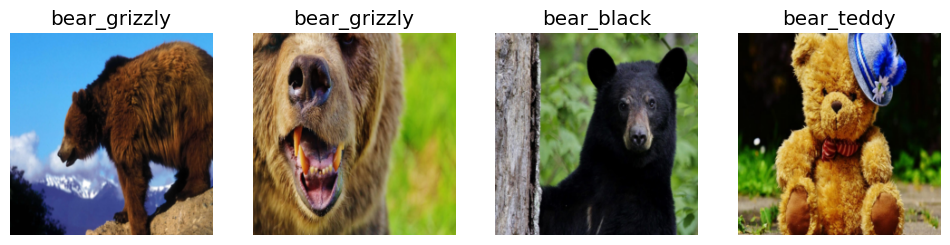

In [34]:
dls.valid.show_batch(max_n=4, nrows=1)

In [35]:

# Creazione del modello
learn = vision_learner(dls, resnet18, metrics=error_rate)


In [17]:
from pathlib import Path
from PIL import Image

def verifica_immagini(path):
    path = Path(path)
    for img_path in path.glob("**/*.jpg"):  # Assumi che le tue immagini siano .jpg
        try:
            img = Image.open(img_path)
            img.verify()  # Verifica l'integrità dell'immagine
        except (IOError, SyntaxError) as e:
            print(f'Immagine corrotta: {img_path}')  # Stampa il percorso dell'immagine corrotta

verifica_immagini("/content/bear/black_bear")

In [54]:
# Addestramento del modello
try:
  learn.fine_tune(8)
except Exception as e:
  print(e)

epoch,train_loss,valid_loss,error_rate,time
0,0.029890,0.005073,0.000000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.026405,0.004209,0.000000,00:04
1,0.019483,0.003355,0.000000,00:03
2,0.025189,0.002197,0.000000,00:03
3,0.026007,0.001977,0.000000,00:05
4,0.020854,0.001986,0.000000,00:03
5,0.017815,0.002158,0.000000,00:03
6,0.016735,0.002295,0.000000,00:04
7,0.014924,0.002210,0.000000,00:04


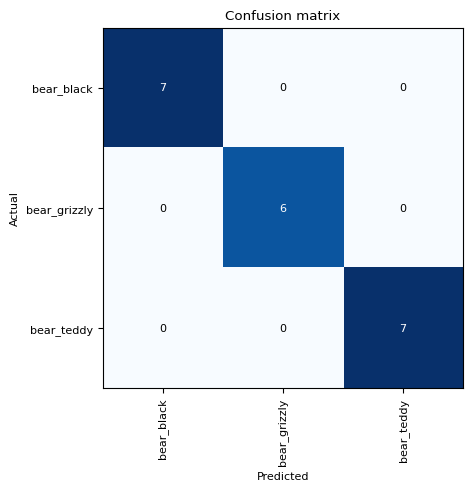

In [55]:
# Interpretazione dei risultati
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

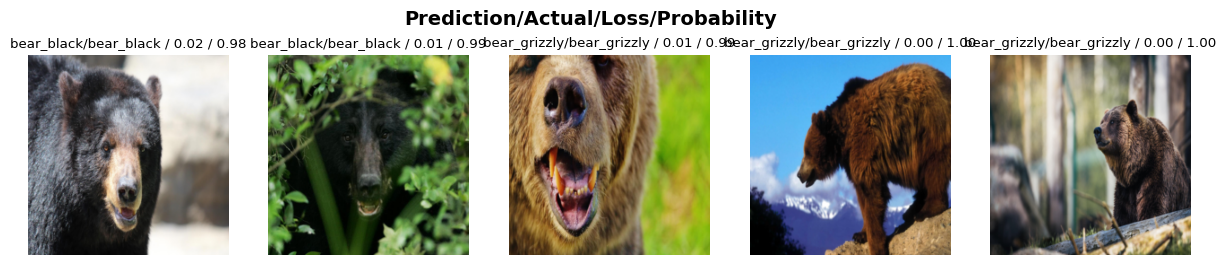

In [56]:
interp.plot_top_losses(5, nrows=1)
# Aumenta l'interlinea
plt.gcf().subplots_adjust(hspace=42)  # Ajusta a piacere
# Imposta una dimensione del font più grande
plt.rcParams.update({'font.size': 8})  # Usa la dimensione che preferisci


In [53]:
learn.export("bear.pkl")